## Seaborn

[Seaborn](https://seaborn.pydata.org/) expande as funcionalidades da matplotlib (as diferenças são ilustradas [aqui](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html)).

* [Make your Data Talk!](https://towardsdatascience.com/make-your-data-talk-13072f84eeac).
* [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science) (Data Camp)
* [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial) (Data Camp)
* [PythonDataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

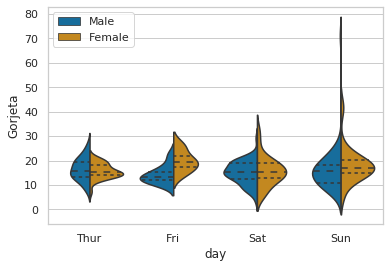

In [4]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips['Gorjeta'] = 100 * tips.tip / tips.total_bill

sns.set(style='whitegrid', palette='colorblind')
sns.violinplot(x='day', y='Gorjeta', hue='sex', split=True, inner='quart', data=tips)
plt.legend(loc='upper left')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [145]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [144]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [115]:
flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

# Gráficos de dispersão (Scatterplots)

Os gráficos de dispersão usam pontos no plano para representar valores em função de duas variáveis. Eles são úteis quando se deseja observar uma relação entre essas duas variáveis no dataset. 
Por exemplo, suponha que queremos saber se existe uma relação entre o preço final da conta de um restaurante e a gorjeta dada ao garçom. Podemos usar um gráfico de dispersão para isso. 

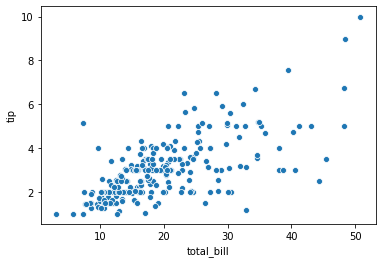

In [4]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

Pela imagem acima, vemos claramente que, para a maior parte das amostras, as gorjetas crescem quando o valor da conta cresce.

Também é possível acrescentar uma terceira variável a um gráfico de dispersão usando cores, símbolos ou tamanhos para representá-la. Por exemplo, se quiséssemos saber a relação entre a conta e a gorjeta de uma mesa considerando o sexo de quem pagou a conta, obteríamos o seguinte gráfico.

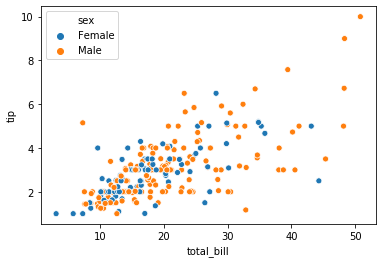

In [5]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

Combinando cores, símbolos e tamanhos, podemos representar ainda mais variáveis, por exemplo se quiséssemos observar a relação entre a conta e a gorjeta, considerando o sexo de quem pagou a conta e o horário da refeição.

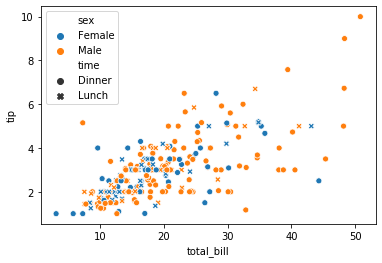

In [6]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='time', data=tips)

Se ainda por cima quiséssemos considerar o dia em que ocorreu a refeição, poderíamos acrescentar o parâmetro de tamanho e teríamos:

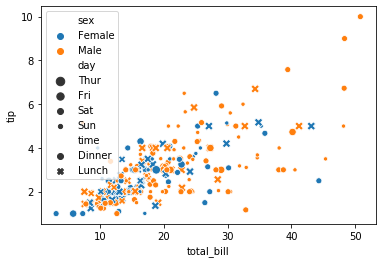

In [7]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='time', size='day' , data=tips)

No entanto, é fácil ver que a representação de mais de três variáveis em um gráfico de dispersão torna a interpretação dos dados mais complicada, o que é o oposto do que queremos. Por isso, os parâmetros de cores, símbolos e tamanhos deve ser usados com cuidado, sempre com o objetivo de facilitar o entendimento dos dados.


Os gráficos de dispersão também podem ser usados para identificar padrões nos dados que permitam o agrupamento de amostras semelhantes, em relação às variáveis consideradadas. Por exemplo, se considerarmos o comprimento e largura da pétala de uma amostra na base Iris, obtemos a divisão do conjunto em dois grupos, que nesse caso sabemos que são duas espécies diferentes. 

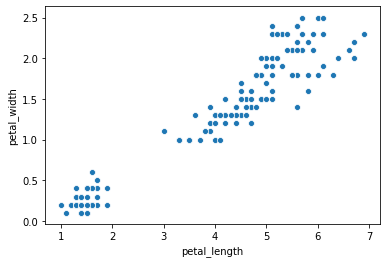

In [8]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris)

Observações:

É importante ter em mente que as relações mostradas no gráfico de dispersão podem não ser causais. O fato de uma variável X estar relacionada com a variável Y não quer dizer que uma mudança em X acarreta uma mudança em Y, porque essas variáveis podem estar relacionadas indiretamente. Por exemplo, embora a diminuição na temperatura do ar esteja relacionada a um aumento nos casos de gripe, a diminuição na temperatura do ar não causa gripe. Essa correlação se dá porque ambas estão relacionadas à variável "quantidade de pessoas em ambientes fechados": uma diminuição na temperatura aumenta a quantidade de pessoas em ambientes fechados, e um aumento na quantidade de pessoas em ambientes fechados aumenta os casos de gripe. 

# Gráficos de barra

Os gráficos de barra usam retângulos de diferentes tamanhos para representar valores numéricos associados a categorias. Eles são úteis quando se quer comparar esses valores, porque as barras fornecem uma boa noção de diferença e proporção. Por exemplo, se quisermos comparar o valor das contas de um restaurante em diferentes horários de atendimento, teremos um gráfico assim: 

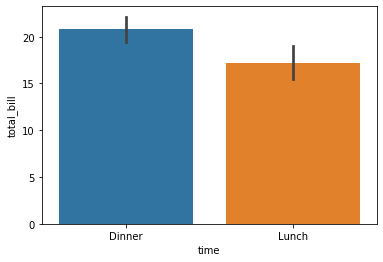

In [102]:
sns.barplot(x='time', y='total_bill', data=tips)

onde os valores numéricos associados às categorias são a média dos valores assumidos pelas amostras (as linhas pretas são o intervalo que essa categoria pode assumir). No gráfico acima, podemos observar de imediato que no jantar se gasta em média mais do que no almoço, embora essa diferença não seja tão grande.

Os gráficos em barra podem ser verticais ou horizontais, e ambas orientações servem para a maior parte dos problemas. Os gráficos horizontais muitas vezes são usados para facilitar a leitura do nome das categorias quando esses são muito longos, como pode ser visto nos gráficos abaixo. 

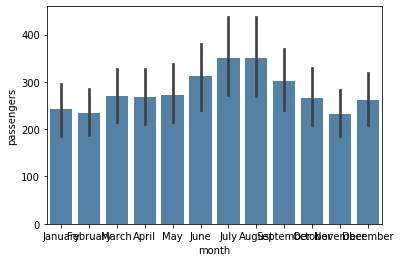

In [18]:
sns.barplot(x='month', y='passengers', data=flights, color='steelblue')

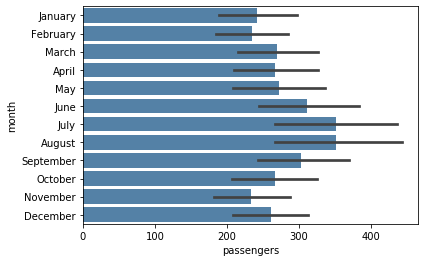

In [20]:
sns.barplot(y='month', x='passengers', data=flights, orient='h', color='steelblue')

Outros dois tipos de gráfico de barra são os gráficos de barras empilhadas e agrupadas. Em ambos os casos são usadas mais de uma barra para cada categoria, representando grupos internos das categorias. Eles são úteis quando se deseja comparar esses grupos internos, além do total da categoria. Por exemplo, se quisermos comparar o valor das contas de um restaurante em diferentes horários de atendimento, e comparar dentro de cada horário o valor das contas de homens e mulheres, podemos fazer usar os dois gráficos a seguir.

Text(0, 0.5, 'total_bill')

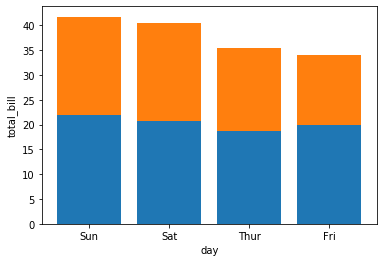

In [137]:
male_thur = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Thur' and tips.loc[i, 'sex'] == 'Male'])
male_fri = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Fri' and tips.loc[i, 'sex'] == 'Male'])
male_sat = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sat' and tips.loc[i, 'sex'] == 'Male'])
male_sun = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sun' and tips.loc[i, 'sex'] == 'Male'])
female_fri = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Fri' and tips.loc[i, 'sex'] == 'Female'])
female_thur = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Thur' and tips.loc[i, 'sex'] == 'Female'])
female_sat = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sat' and tips.loc[i, 'sex'] == 'Female'])
female_sun = np.mean([tips.loc[i,'total_bill'] for i in range(tips.shape[0]) if tips.loc[i, 'day'] == 'Sun' and tips.loc[i, 'sex'] == 'Female'])
male = [male_sun, male_sat, male_thur, male_fri]
female = [female_sun, female_sat, female_thur, female_fri]

matplotlib.pyplot.bar(x=['Sun', 'Sat', 'Thur','Fri'], height=male)
matplotlib.pyplot.bar(x=['Sun', 'Sat', 'Thur','Fri'], height=female, bottom=male)
matplotlib.pyplot.xlabel('day')
matplotlib.pyplot.ylabel('total_bill')

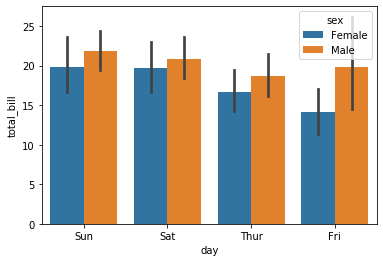

In [135]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)

A escolha de qual desses dois tipos de gráficos usar depende do objetivo da visualização. Se o que se deseja é comparar a quantidade dos componentes das categorias ao longo das diferentes categorias, o gráfico de barras agrupadas seria melhor. Em outras palavras, é mais facil comparar o valor da conta das mulheres nos dois horários de atendimento pelo segundo gráfico, uma vez que as barras começam no mesmo ponto e só precisamos comparar suas alturas. Já no primeiro gráfico, para comparar esses valores temos que observar o comprimento das barras levando em consideração o nível de onde começam, o que dificulta a interpretação.

Por outro lado, no gráfico de barras agrupadas é difícil comparar os valores totais das categorias, uma vez que eles estão divididos por componentes. Portanto, se o objetivo é observar a composição do grupo sem perder a comparação entre eles, o melhor seria usar o gráfico de barras empilhadas.

Observações:
    
1 - Na biblioteca seaborn, os gráficos de barra são coloridos por padrão. No entanto, não é uma boa prática colorir gráficos de barra sem que as cores tenham significados porque isso polue o gráfico e torna a interpretação mais difícil. Compare o gráfico abaixo com os mesmo dados mostrados anteriormente. As cores trouxeram alguma informação?

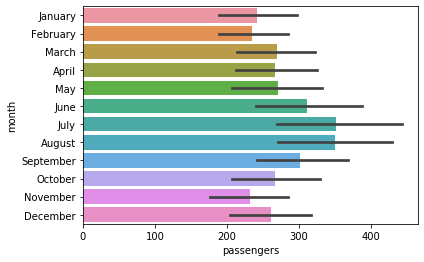

In [89]:
sns.barplot(y='month', x='passengers', data=flights, orient='h')

2 - É preciso ter cuidado com a quantidade de componentes das categorias na hora de usar um gráfico de barras agrupadas ou empilhadas, pois um pequeno aumento na quantidade de componentes pode tornar a interpretação do gráfico mais difícil.

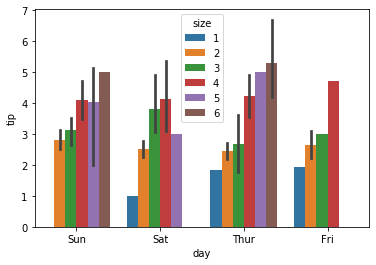

In [133]:
sns.barplot(x='day', y='tip', hue='size', data=tips)